In [100]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer

In [101]:
from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/mail_data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [102]:
print(data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [103]:
x = data['Message']
y = data['Category']

In [104]:
print(data['Category'].unique())

['ham' 'spam']


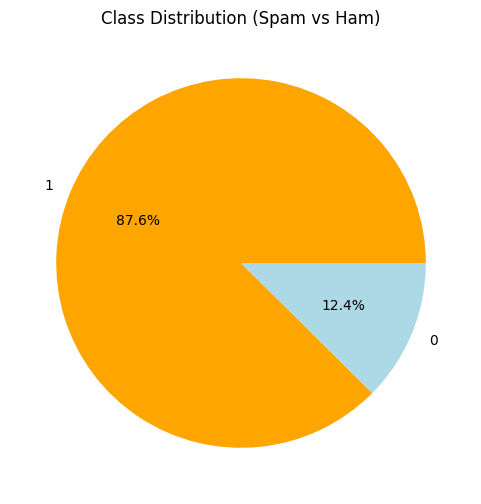

In [135]:
# Pie chart of class distribution
plt.figure(figsize=(6,6))
data['Category'].value_counts().plot.pie(autopct='%1.1f%%', colors=['orange', 'lightblue'])
plt.title('Class Distribution (Spam vs Ham)')
plt.ylabel('')
plt.show()


In [111]:
print(data.duplicated().sum())

415


In [112]:
data.drop_duplicates(inplace=True)

In [113]:
data['Category'] = data['Category'].replace({'spam': 0, 'ham': 1})
print(data)

      Category                                            Message
0            1  Go until jurong point, crazy.. Available only ...
1            1                      Ok lar... Joking wif u oni...
2            0  Free entry in 2 a wkly comp to win FA Cup fina...
3            1  U dun say so early hor... U c already then say...
4            1  Nah I don't think he goes to usf, he lives aro...
...        ...                                                ...
5567         0  This is the 2nd time we have tried 2 contact u...
5568         1               Will ü b going to esplanade fr home?
5569         1  Pity, * was in mood for that. So...any other s...
5570         1  The guy did some bitching but I acted like i'd...
5571         1                         Rofl. Its true to its name

[5157 rows x 2 columns]


In [115]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [117]:
fea_ex = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
x_train_fea = fea_ex.fit_transform(x_train)
x_test_fea = fea_ex.transform(x_test)

# After splitting the data, apply the replacement to y_train and y_test
y_train = y_train.replace({'spam': 0, 'ham': 1})
y_test = y_test.replace({'spam': 0, 'ham': 1})

# Now you can convert to integers
y_train = y_train.astype('int')
y_test = y_test.astype('int')

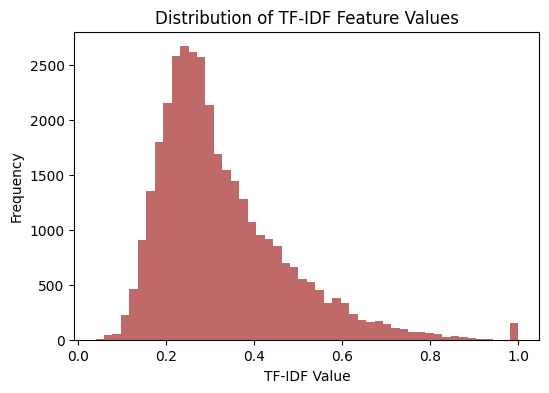

In [133]:
# Histogram of TF-IDF feature values
plt.figure(figsize=(6,4))
plt.hist(x_train_fea.data, bins=50, color='brown', alpha=0.7)
plt.title('Distribution of TF-IDF Feature Values')
plt.xlabel('TF-IDF Value')
plt.ylabel('Frequency')
plt.show()


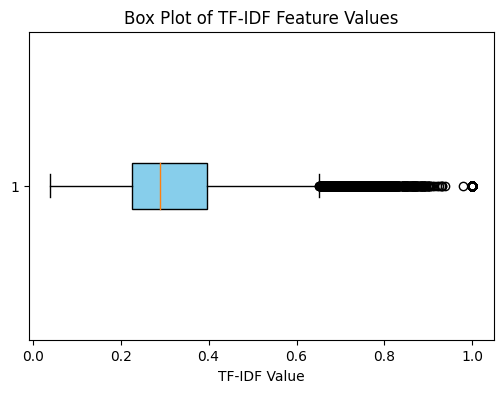

In [128]:
# Box plot of TF-IDF feature values
plt.figure(figsize=(6,4))
plt.boxplot(x_train_fea.data, vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Box Plot of TF-IDF Feature Values')
plt.xlabel('TF-IDF Value')
plt.show()


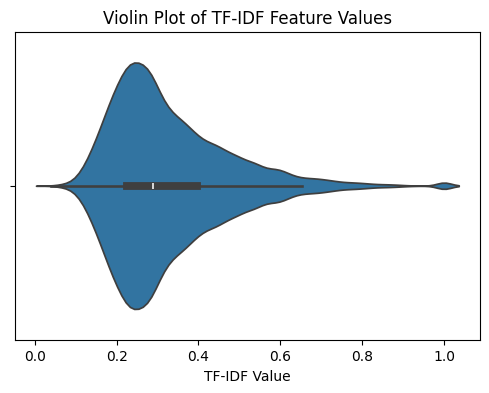

In [131]:
import seaborn as sns

# Violin plot of TF-IDF feature values
plt.figure(figsize=(6,4))
sns.violinplot(x=x_train_fea.data)
plt.title('Violin Plot of TF-IDF Feature Values')
plt.xlabel('TF-IDF Value')
plt.show()


In [158]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train_fea, y_train)

RandomForestClassifier()

In [159]:
pred_train = model.predict(x_train_fea)
acc_train = accuracy_score(pred_train, y_train)
print(acc_train)

1.0


In [160]:
pred_test = model.predict(x_test_fea)
acc_test = accuracy_score(pred_test, y_test)
print(acc_test)

0.9802690582959641


In [161]:
accuracy = accuracy_score(y_test, pred_test)
print(accuracy)

0.9802690582959641


In [162]:
input_email = ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845"]
input_feat = fea_ex.transform(input_email)
prediction = model.predict(input_feat)
print(prediction)

if prediction==0:
  print("Spam")
else:
  print("Ham")

[0]
Spam


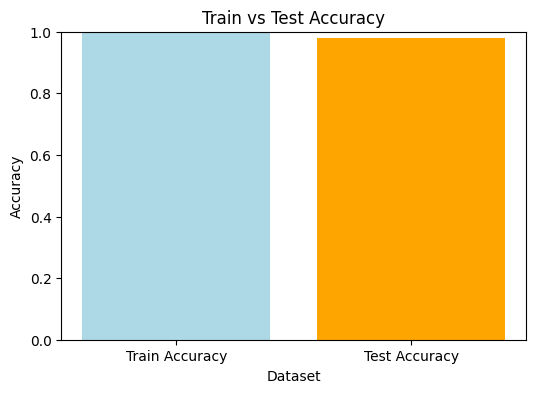

In [163]:
import matplotlib.pyplot as plt

# Bar plot for train vs test accuracy
plt.figure(figsize=(6,4))
plt.bar(['Train Accuracy', 'Test Accuracy'], [acc_train, acc_test], color=['lightblue', 'orange'])
plt.ylim([0.0, 1.0])
plt.title('Train vs Test Accuracy')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.show()
